# Customer Churn Analysis

## Table of Contents

* [<font color='#c8271b'>1. Project initiation</font>](#chapter1)
    * [<font color='#c8271b'>1.1 Reestart the session</font>](#section_1_1)
    * [<font color='#c8271b'>1.2 Import libraries</font>](#section_1_2) 
      
        
* [<font color='#c8271b'>2. Data preprocessing</font>](#chapter2)
    
    * [<font color='#c8271b'>2.1 Import data</font>](#section_2_1)
    * [<font color='#c8271b'>2.2 Exploratory data analysis</font>](#section_2_2)
    * [<font color='#c8271b'>2.3 Missing data</font>](#section_2_3)
    * [<font color='#c8271b'>2.4 Outlier detection</font>](#section_2_4)
    * [<font color='#c8271b'>2.5 Categorical features</font>](#section_2_5)
        * [<font color='#c8271b'>2.5.1 Identify unique values</font>](#sub_section_2_5_1)
        * [<font color='#c8271b'>2.5.2 One-Hot encoding</font>](#sub_section_2_5_2)
    * [<font color='#c8271b'>2.6 Feature engineering</font>](#section_2_6)
        * [<font color='#c8271b'>2.6.1 Sentiment analysis on 'feedback' </font>](#sub_section_2_6_1)
    * [<font color='#c8271b'>2.7 Feature selection</font>](#section_2_7)
        * [<font color='#c8271b'>2.7.1 Multicollinearity</font>](#sub_section_2_7_1)
        * [<font color='#c8271b'>2.7.2 Sklearn SelectKBest</font>](#sub_section_2_7_2)
        * [<font color='#c8271b'>2.7.3 Random Forest Importance</font>](#sub_section_2_7_3)
        
    * [<font color='#c8271b'>2.8 Feature scaling</font>](#section_2_8ths )
       
        
* [<font color='#c8271b'>3. Model selection</font>](#chapter3)
    * [<font color='#c8271b'>2.1 Initial considerations</font>](#section_3_1)
    * [<font color='#c8271b'>2.2 Metric selection</font>](#section_3_2)
    * [<font color='#c8271b'>3.3 Baseline Classification Algorithms comparison</font>](#section_3_3)
    
        
* [<font color='#c8271b'>4. Model improvement</font>](#chapter4)
    * [<font color='#c8271b'>4.1 Optuna hyperparameter optimization</font>](#section_4_1)        
        
        
* [<font color='#c8271b'>5. Model deployment</font>](#chapter5)

# 1. Project initiation <a class="anchor" id="chapter1"></a>

### 1.1 Reestart the session  <a class="anchor" id="section_1_1"></a>
It’s a good practice to restart the session and to remove all the temporary variables from the interactive development environment before we start coding

In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

### 1.2 Import libraries and basic configuration  <a class="anchor" id="section_1_2"></a>


In [2]:
pip install xgboost

     |████████████████████████████████| 1.7 MB 3.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install optuna

     |████████████████████████████████| 365 kB 3.2 MB/s eta 0:00:01
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached alembic-1.9.2-py3-none-any.whl (210 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Attempting uninstall: zipp
    Found existing installation: zipp 2.2.0
    Uninstalling zipp-2.2.0:
      Successfully uninstalled zipp-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

     |████████████████████████████████| 159 kB 4.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install flair

  Using cached flair-0.11.3-py3-none-any.whl (401 kB)
  Using cached ftfy-6.1.1-py3-none-any.whl (53 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached Wikipedia_API-0.5.8-py3-none-any.whl (13 kB)
     |████████████████████████████████| 1.1 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 135.3 MB 276 kB/s eta 0:00:011    |████████                        | 34.0 MB 4.7 MB/s eta 0:00:22
  Using cached segtok-1.5.11-py3-none-any.whl (24 kB)
  Using cached gdown-4.4.0.tar.gz (14 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.3 MB 9.0 MB/s eta 0:00:01
  Using cached pptree-3.1.tar.gz (3.0 kB)
  Using cached bpemb-0.3.4-py3-none-any.whl (19 kB)
  Using cached conllu-4.5.2-py2.py3-none-any.whl (16 kB)
     |████████████████████████████████| 24.0 MB 8.4 MB/s eta 0:00:011
  Using cached konoha-4.6.5-py3-none-any.whl (20 kB)
  

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=0ce6c879ec9e1d18b9318c4d34d622735ec47bf76e3f682068e9abd8c69b1328
  Stored in directory: /Users/lauraruizmartinez/Library/Caches/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
  Created wheel for sqlitedict: filename=sqlitedict-2.1.0-py3-none-any.whl size=16851 sha256=6f0da7816e116fa99599a036c45d1c7cbd9c78bf897ddcd1a2ea7ca335f54ddc
  Stored in directory: /Users/lauraruizmartinez/Library/Caches/pip/wheels/a5/d3/21/67c848a32cd64013ca7728671078ec59444377cf2ae6e4ad54
  Created wheel for overrides: filename=overrides-3.1.0-py3-none-any.whl size=10173 sha256=1247e3c02585d42b4b0f6f4b97868bc9e81fbec5326e619ebf66eafdd9b6a718
  Stored in directory: /Users/lauraruizmartinez/Library/Caches/pip/wheels/3a/0d/38/01a9bc6e20dcfaf0a6a7b552d03137558ba1c38aea47644682
Successfully built gdown pptree mpld3 langdetect sqlitedict overrides
ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, w

In [ ]:
import pandas as pd
import numpy as np
import joblib
from datetime import date
from scipy import stats

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Text
import re
import string
from flair.models import TextClassifier
from flair.data import Sentence
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
import optuna

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None

## 2. Data preprocessing <a class="anchor" id="chapter2"></a>
Before doing any preprocessing, we will take a look at the data to understand the data to acknowledge the potential problems we are dealing with. In order to accomplish our purpose we will check distribution of the variables, presence of nulls, column types, etc..

#### 2.1 Import the dataset <a class="anchor" id="section_2_1"></a>

In [ ]:
df = pd.read_csv('./data/ds_challenge_10k_clean.tsv', sep='\t')

#### 2.2 Exploratory data analysis  <a class="anchor" id="section_2_2"></a>

In this section, we need to look at the dataset in general and each column in detail to get a better understanding of the input data.


From the head & column methods, we get an idea that this is an app customer dataset where each record entails the nature of contains information about users such as demographics, behavior,purchase data, etc. Column engagement indicates a level of customer interaction quality.

In [ ]:
df.head()

In [ ]:
df.columns

There is not duplicated registers. This is not usually a problem, we check it just in case

In [ ]:
print('# of registers before removing duplicates: ', df.count())
print('# of registers after removing duplicates: ', df.drop_duplicates().count())

Now we will use the **describe** method to show **basic statistic information of each numerical column** of the dataset. This shows us and interesting first overview:
- **Users mean age is 37**, having values from 10 to 64
- Days since last logic are pretty consistent with a mean of 12.7 and std of 5.54
- Average time spent is 246 min. In addition, we observe that there are negative values. We will take a look at this later because probably we will have to treat this negative values as it makes no sense to have negative time.
- In terms of engagement values go from 1 to 5 with a mean of 2,4.

In [ ]:
df.describe()

Now let's look for **column types** and **missing values**. The dataset has 10000 registers and 19 columns. In addition, both categorical and numerical columns have missing values.

In [ ]:
df.info()

Now it's time to check the proportion of **null values** for each column. 'Complaint_status' is poorly informed

In [ ]:
NA = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
            for i in (df.isna().sum()/df.shape[0]*100).tolist()]], 
            columns=df.columns, index=['NA Count', 'NA Percent']).T.\
            sort_values(by='NA Count',ascending =False)

NA.style.background_gradient(cmap='OrRd_r', subset=['NA Count'])

In the **correlation matrix** we can observe that **'avg_transaction_value' and 'points_in_wallet' are the most coorelated variables with 'engagement'**

In [ ]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize = (5,5))
ax = sn.heatmap(corrmat, cmap='OrRd_r', square=True, linewidths=0.1, annot=True, annot_kws={"fontsize":7})  

**Find positive and negative correlations with engagement.** Let’s have a look into the positive and negative correlations. None of the variables seem to be strongly correlated with engagement. Besides, we will try to create new features in order to obtain good predictors

In [ ]:
correlations = df.corrwith(df.engagement)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = True)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

**Plot positive & negative correlations:**

In [ ]:
correlations = df.corrwith(df.engagement)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (15, 5), 
        fontsize = 15, 
        color = '#c8271b',
        rot = 45, grid = False)
plt.title('Correlation with engagement \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

Finally we will plot the **histogram** to check numerical variables **distribution**. 

In [ ]:
df.hist(bins=10, grid=False, figsize=(12,8), color='#c8271b', zorder=2, rwidth=0.9)

Same for categorical variables.

In [ ]:
categorical_features = df.select_dtypes(include='object').columns.to_list()
categorical_features.remove('feedback')
print(categorical_features)
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i, categorical_feature in enumerate(df[categorical_features[:5]]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i], color='#c8271b').set_title(categorical_feature)
fig.show()

In [ ]:
round(df['region_category'].value_counts() / len(df), 2).to_clipboard()

In [ ]:
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
for i, categorical_feature in enumerate(df[categorical_features[5:]]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i], color='#c8271b').set_title(categorical_feature)
fig.show()

Now let's analyze **customer engagement distribution**

In [ ]:
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Customer Engagement', size = 20, color = "black")
explode = ( 0.05, 0.3)
labels = ["Very low","Low", "Medium", "High", "Very high"]
sizes = df["engagement"].dropna().value_counts()
ax.pie(sizes,        colors=sn.color_palette("OrRd_r"),
       startangle=60,
       labels=labels,
       autopct='%1.0f%%',
       pctdistance=0.9)
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

The final step of the EDA will consist on **analyzing the engagement distribution by categorical variables.** 

In [ ]:
def engagement_by(column):
    engagement = df.groupby([column,'engagement']).size().unstack()
    colors  = ['#EA3C53','#FF0800', '#CD5C5C', '#7C0A02', '#800000']
    ax = (engagement.T*100.0 / engagement.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot=0,figsize = (13,5))
    plt.ylabel('Proportion of Customers\n',
    horizontalalignment="center",fontstyle = "normal", 
    fontsize = "large", fontfamily = "sans-serif")
    plt.xlabel(column + '\n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "large", 
    fontfamily = "sans-serif")
    plt.title('Engagement  by ' + column + '\n',
    horizontalalignment="center", fontstyle = "normal", 
    fontsize = "22", fontfamily = "sans-serif")
    plt.legend(loc='upper right', fontsize = "medium")
    plt.xticks(rotation=45, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)

In [ ]:
[engagement_by(column) for column in categorical_features]

#### 2.3 Missing data <a class="anchor" id="section_2_3"></a>

#### 2.3.1 Target <a class="anchor" id="sub_section_2_3_1"></a>
The first thing that we observe is that we have **missing values in the target variable** 'engagement'. As the proportion of null is around **3%** if the data **we will remove it because the target variable is not advised to be imputed (unless you are sure about the value)**. For other missing features, you we will use imputation strategies.

In [ ]:
target = 'engagement'
df = df[df[target].notnull()].reset_index(drop=True)

In [ ]:
df['engagement'] = df['engagement'].astype(int)

#### 2.3.2 Numerical columns <a class="anchor" id="sub_section_2_3_2"></a>
We have missing values in some of the numeric columns of the dataset. We will **fill** their **missing values with average of each column.**

In [ ]:
def filling_nulls_with_mean(df):
    na_cols = df.isna().any()
    na_cols = na_cols[na_cols == True].reset_index()
    na_cols = na_cols["index"].tolist()
    print('Columns with null values: ', na_cols)
    for col in df.columns[1:]:
         if col in na_cols:
            if df[col].dtype != 'object':
                 df[col] =  df[col].fillna(df[col].mean()).round(0)
    return df

In [ ]:
df = filling_nulls_with_mean(df)

Now we check that the numerical columns with null values have been filled

In [ ]:
df.isna().any()

#### 2.4 Outlier detection  <a class="anchor" id="section_2_4"></a>
There are multiple reasons why there can be outliers in the dataset, like Human errors(Wrong data entry), Measurement errors(System/Tool error), Data manipulation error(Faulty data preprocessing error), Sampling errors(creating samples from heterogeneous sources), etc. Detecting and treating these Outliers is important for learning a robust and generalizable machine learning system.

We will review briefly the most used outlier detection techniques:

- **Z-score**: The Z-score(also called the standard score) is an important concept in statistics that indicates how far away a certain point is from the mean. By applying Z-transformation we shift the distribution and make it 0 mean with unit standard deviation. For example — A Z-score of 2 would mean the data point is 2 standard deviation away from the mean. It assumes that the data is normally distributed and hence the % of data points that lie between -/+1 stdev. is ~68%, -/+2 stdev. is ~95% and -/+3 stdev. is ~99.7%. Hence, if the Z-score is >3 we can safely mark that point to be an outlier.


- **Inter-Quartile Range Method**: The interquartile range method, best shown using a box plot, divides data into quartiles by defining three points:

    - Quartile 1 (Q1) represents 25th percentile
    - Quartile 2 (Q2) represents 50th percentile
    - Quartile 3 (Q3) represents 75th percentile

    The box in the boxplot represents the IQR range which is defined as the range between Q1 and Q3; IQR = Q3 — Q1 and data points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are defined as outliers.
    
- **Automatic Outlier Detection**: In machine learning, an approach to tackling the problem of outlier detection is one-class classification. One-Class Classification, or OCC for short, involves fitting a model on the 'normal' data and predicting whether new data is normal or an outlier/anomaly. Examples of this are:
    - Local Outlier Factor
    - Isolation Forest




In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

In [ ]:
numerical_df = df[numerical_features]
outlier_df = numerical_df[(np.abs(stats.zscore(numerical_df)) < 3).all(axis=1)]

In [ ]:
df = pd.merge(df, outlier_df, how='inner')

#### 2.5 Categorical features <a class="anchor" id="section_2_5"></a>

In this case we are dealing with multiple categorical features can assume that **all variables are nominal**, which basicly means that do not have a particular order so I will opt for **One-hot Encoding** or Frequency Encoding.


In [ ]:
categorical_features = df.select_dtypes(include='object').columns.to_list()
categorical_features.remove('feedback')

In [ ]:
categorical_features

#### 2.5.1 Identify unique values <a class="anchor" id="sub_section_2_5_1"></a>

We have 11 different categorical column in the dataset. First of all, let's see how many different values take each category in order to choose the best treatment for each of them. As the number of possibilities are up to 6, we will apply One-Hot encoding.

In [ ]:
for feat in categorical_features:
    print('Number of different ' + feat + ':', df[feat].nunique())

#### 2.5.2 One-Hot encoding <a class="anchor" id="sub_section_2_2_5_2"></a>

we are ready to apply **SKLearn's One-Hot Encoder** to get dummy variables.

https://inmachineswetrust.com/posts/drop-first-columns/

In [ ]:
def categorical_features_encoding(df, onehot_categorical_cols_list):
    encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
    dfOneHot = pd.DataFrame(encoder.fit_transform(df[onehot_categorical_cols_list]))
    dfOneHot.columns = encoder.get_feature_names_out()
    df = pd.concat([df, dfOneHot], axis=1)\
           .drop(onehot_categorical_cols_list, axis=1)    
    return df

In [ ]:
df = categorical_features_encoding(df, categorical_features)

#### 2.6 Feature engineering <a class="anchor" id="section_2_6"></a>

#### 2.6.1 Sentiment analysis on 'feedback' <a class="anchor" id="sub_section_2_6_1"></a>
We will apply a technique known as Sentiment Analysis to separate feedbacks into 3 categories Positive, Negative, and Neutral. Although manual implementation is a posibility, nowadays everyone uses one of the following packages: NLTK, TextBlob and Flair

- **NLTK (VADER) and TextBlob:**

    Both of these packages rely on a rules-based sentiment analyzer. It, therefore, attaches a positive or negative rating to certain words (ex. horrible has a negative association), pays attention to negation if it exists, and returns values based on these words. This tends to work fine, and has the advantage of being simple and extremely fast, but has some weaknesses:

    - As sentences get longer, more neutral words exist, and therefore, the overall score tends to normalize more towards neutral as well (or does it)
    - Sarcasm and jargon are often misinterpreted


- **Flair:**

    Flair is a pre-trained embedding-based model. This means that each word is represented inside a vector space. Words with vector representations most similar to another word are often used in the same context. This allows us, to, therefore, determine the sentiment of any given vector, and therefore, any given sentence. The embeddings are based on this paper if you are curious about the more technical aspects.

    Flair tends to be much slower than its rule-based counterparts but comes at the advantage of being a trained NLP model instead of a rule-based model, which, if done well comes with added performance.

First of all we will **clean the text** to make it easier to analyze

In [734]:
def clean_title(x:str):    
    # lowering the text
    x=x.lower() 
 
    #removing square brackets
    x = re.sub('\[.*?\]', '', x)
    x = re.sub('<.*?>+', '', x)
    x = re.sub('[^a-zA-Z0-9 \n\.]', ' ', x)

    #removing hyperlink
    x = re.sub('https?://\S+|www\.\S+', '', x) 

    #removing puncuation
    x = re.sub('[%s]' % re.escape(string.punctuation), '', x) 
    x = re.sub('\n', '', x) 

    #remove words containing numbers
    x = re.sub('\w*\d\w*', '', x) 
    return x

In [735]:
sia = TextClassifier.load('en-sentiment')

2023-01-22 21:34:45,135 loading file /Users/lauraruizmartinez/.flair/models/sentiment-en-mix-distillbert_4.pt


In [736]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    results = sentence.labels[0].to_dict()
    score = results['confidence']
    sentiment = results['value']
    return sentence.labels[0]

def sentiment(score):
    if "POSITIVE" in str(score):
        return "Positive"
    elif "NEGATIVE" in str(score):
        return "Negative"
    else:
        return "Neutral"

We have added two columns in our dataset with sentiment score and emotions based on score.

In [737]:
feedback_df = df[df['feedback'].notnull()].reset_index(drop=True)

In [738]:
clean_feedback_df['feedback'] =  clean_feedback_df['feedback'].astype(str).apply(clean_title)

In [739]:
polarity_scores = clean_feedback_df["feedback"].astype("str").apply(flair_prediction)

In [740]:
clean_feedback_df["sentiment_score"] = polarity_scores
clean_feedback_df["sentiment"] = clean_feedback_df["sentiment_score"].apply(sentiment)

Finally let's do a **Countplot on sentiment categories** We see thatFeedback has mostly neutral and negative emotions.

Text(0.5, 1.0, 'Sentiment Distribution')

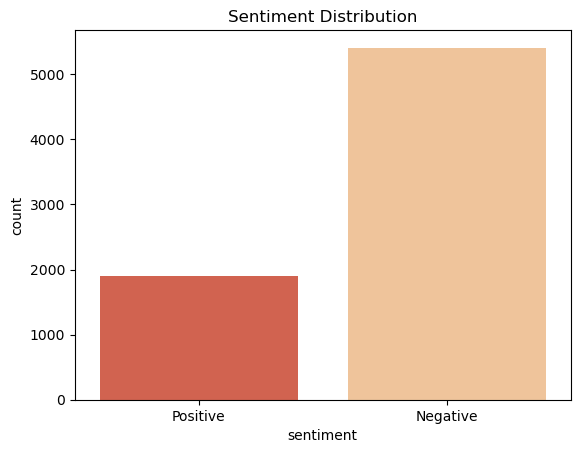

In [741]:
sn.countplot(data=clean_feedback_df,x="sentiment",palette="OrRd_r")
plt.title('Sentiment Distribution')

Finally we will use the **word cloud** library to display the most common word used in feedback

In [742]:
np.array(list(STOPWORDS))[0:5]

array(['why', 'yours', 'herself', 'me', "you'd"], dtype='<U10')

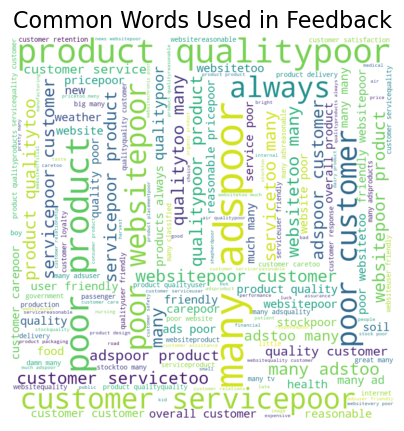

In [743]:
fig, ax = plt.subplots( figsize=[5, 5], facecolor = None)

wc = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,repeat=True,stopwords = STOPWORDS)
wc.generate("".join(clean_feedback_df['feedback'].astype(str)))
ax.axis("off")
ax.imshow(wc, interpolation="bilinear")
ax.set_title('Common Words Used in Feedback',fontsize=16);

Now we will look at the **most frequent feedbacks**

In [744]:
clean_feedback_df["text"] = clean_feedback_df["feedback"].apply(lambda x: [s.strip() for s in x.split("|")])
c = Counter([item for row in clean_feedback_df.text for item in row])
c.most_common(20)

[('poor product quality', 98),
 ('poor customer service', 66),
 ('many ads', 62),
 ('customer service', 49),
 ('official website', 45),
 ('poor website', 44),
 ('poor customer customer service', 38),
 ('product quality', 35),
 ('too many ads', 33),
 ('poor product quality quality', 30),
 ('poor overall product quality', 30),
 ('too many many ads', 30),
 ('extremely poor product quality', 28),
 ('too too many ads', 28),
 ('poor overall customer service', 28),
 ('poor weather website', 28),
 ('poor news website', 28),
 ('the poor website', 27),
 ('poor quality customer service', 27),
 ('too much many ads', 25)]

Finally we will assing a numeric column to each category: -1 for negative reviews, 0 for neutral and 1 for positive

In [745]:
sentiment_dict = {'Negative':-1, 'Neutral':0, 'Positive':1}

In [746]:
clean_feedback_df['sentiment'] = clean_feedback_df['sentiment'].map(sentiment_dict)

In [747]:
df['index'] = df.index
clean_feedback_df['index'] = clean_feedback_df.index

In [748]:
df = pd.merge(df, clean_feedback_df[['index','sentiment']], on=['index'], how='left')\
        .fillna(0)

In [749]:
df.drop(['index', 'feedback'], axis=1, inplace=True)

### 2.7 Feature selection <a class="anchor" id="section_2_7"></a>

#### 2.7.1 Multicollinearity  <a class="anchor" id="sub_section_2_7_1"></a>

**Correlation is a measure of the linear relationship of 2 or more variables**. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, **variables should be correlated with the target but should be uncorrelated among themselves.**

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the **Pearson Correlation** here.

We will set **0.9 as the threshold for selecting the variables**. If we find that the **predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable**. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as **multicollinearity** and can lead to skewed or misleading results. Luckily, decision trees and boosted tree algorithms are immune to multicollinearity by nature, When data splitted, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or linear Regression are not immune to that problem and should be fixed before training the model.

In [750]:
#Feature selection class to eliminate multicollinearity
class MultiCollinearityEliminator():
    
    #Class Constructor
    def __init__(self, df, target, threshold):
        self.df = df
        self.target = target
        self.threshold = threshold

    #Method to create and return the feature correlation matrix dataframe
    def createCorrMatrix(self, include_target = False):
        #Checking we should include the target in the correlation matrix
        if (include_target == False):
            df_temp = self.df.drop([self.target], axis =1)
            
            #Setting method to Pearson to prevent issues in case the default method for df.corr() gets changed
            #Setting min_period to 30 for the sample size to be statistically significant (normal) according to 
            #central limit theorem
            corrMatrix = df_temp.corr(method='pearson', min_periods=30).abs()
        #Target is included for creating the series of feature to target correlation - Please refer the notes under the 
        #print statement to understand why we create the series of feature to target correlation
        elif (include_target == True):
            corrMatrix = self.df.corr(method='pearson', min_periods=30).abs()
        return corrMatrix

    #Method to create and return the feature to target correlation matrix dataframe
    def createCorrMatrixWithTarget(self):
        #After obtaining the list of correlated features, this method will help to view which variables 
        #(in the list of correlated features) are least correlated with the target
        #This way, out the list of correlated features, we can ensure to elimate the feature that is 
        #least correlated with the target
        #This not only helps to sustain the predictive power of the model but also helps in reducing model complexity
        
        #Obtaining the correlation matrix of the dataframe (along with the target)
        corrMatrix = self.createCorrMatrix(include_target = True)                           
        #Creating the required dataframe, then dropping the target row 
        #and sorting by the value of correlation with target (in asceding order)
        corrWithTarget = pd.DataFrame(corrMatrix.loc[:,self.target]).drop([self.target], axis = 0).sort_values(by = self.target)                    
        #print(corrWithTarget, '\n')
        return corrWithTarget

    #Method to create and return the list of correlated features
    def createCorrelatedFeaturesList(self):
        #Obtaining the correlation matrix of the dataframe (without the target)
        corrMatrix = self.createCorrMatrix(include_target = False)                          
        colCorr = []
        #Iterating through the columns of the correlation matrix dataframe
        for column in corrMatrix.columns:
            #Iterating through the values (row wise) of the correlation matrix dataframe
            for idx, row in corrMatrix.iterrows():                                            
                if(row[column]>self.threshold) and (row[column]<1):
                    #Adding the features that are not already in the list of correlated features
                    if (idx not in colCorr):
                        colCorr.append(idx)
                    if (column not in colCorr):
                        colCorr.append(column)
        #print(colCorr, '\n')
        return colCorr

    #Method to eliminate the least important features from the list of correlated features
    def deleteFeatures(self, colCorr):
        #Obtaining the feature to target correlation matrix dataframe
        corrWithTarget = self.createCorrMatrixWithTarget()                                  
        for idx, row in corrWithTarget.iterrows():
            #print(idx, '\n')
            if (idx in colCorr):
                self.df = self.df.drop(idx, axis =1)
                break
        return self.df

    #Method to run automatically eliminate multicollinearity
    def autoEliminateMulticollinearity(self):
        #Obtaining the list of correlated features
        colCorr = self.createCorrelatedFeaturesList()                                       
        while colCorr != []:
            #Obtaining the dataframe after deleting the feature (from the list of correlated features) 
            #that is least correlated with the taregt
            self.df = self.deleteFeatures(colCorr)
            #Obtaining the list of correlated features
            colCorr = self.createCorrelatedFeaturesList()                                     
        return self.df

In [751]:
multicollinearityeliminator = MultiCollinearityEliminator(df=df, target='engagement' , threshold=0.80)

In [752]:
filtered_df = multicollinearityeliminator.autoEliminateMulticollinearity()

In [753]:
print(len(filtered_df.columns), filtered_df.columns)

40 Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'engagement', 'gender_F', 'gender_nan', 'region_category_City',
       'region_category_Town', 'region_category_Village',
       'region_category_nan', 'membership_category_Basic Membership',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes', 'joined_through_referral_nan',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'preferred_offer_types_nan',
       'medium_of_operation_Both', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'medium_of_operation_nan',
    

In [754]:
columns_selection = ['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
        'engagement', 'gender_F', 'gender_nan',
       'region_category_City', 'region_category_Town',
       'region_category_Village', 'region_category_nan',
       'membership_category_Basic Membership',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_No',
       'joined_through_referral_Yes', 'joined_through_referral_nan',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'preferred_offer_types_nan',
       'medium_of_operation_Both', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'medium_of_operation_nan',
       'internet_option_Fiber_Optic', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'offer_application_preference_Yes',
       'past_complaint_No', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved',
       'complaint_status_nan', 'sentiment']

In [755]:
filtered_df = df[columns_selection].copy()

In [756]:
filtered_df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,engagement,gender_F,gender_nan,region_category_City,region_category_Town,region_category_Village,region_category_nan,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,joined_through_referral_nan,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,preferred_offer_types_nan,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,medium_of_operation_nan,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,offer_application_preference_Yes,past_complaint_No,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,complaint_status_nan,sentiment
0,24,17.0,101.50,32593.20,15.0,801.0,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,53,12.0,324.61,39155.49,21.0,686.0,3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.0
2,53,20.0,47.71,35434.17,12.0,675.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0
3,61,19.0,451.66,30621.93,7.0,756.0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,46,12.0,266.68,50462.15,16.0,807.0,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.0


There are a lot of **feature selection** methods available for both supervised and unsupervised problems. We will just try a few of them but I think it is interesting to have a general overview before jumping into any of them.

![Feature selection methods](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/feature-selection-methods-1.png?resize=767%2C452&ssl=1)

Feature selection methods | Source: neptune.ai

### 2.7.2 Sklearn SelectKBest <a class="anchor" id="sub_section_2_7_2"></a>

Scikit-learn API provides SelectKBest class for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. In this case we will use **f_regression** as measure of score, which is a univariate linear regression tests that returns the F-statistic and p-values.

In [757]:
X = filtered_df[filtered_df.columns[filtered_df.columns != 'engagement']]
y = filtered_df['engagement']

Now it is time to apply SelectKBest from scikit learn to get the most explicative variables

In [758]:
def get_important_features_select_kbest_method(df, n_features):
    # define feature selection
    fs = SelectKBest(score_func=f_regression, k=n_features)
    # apply feature selection
    X_selected = fs.fit_transform(X, y)

    names = X.columns.values[fs.get_support()]
    scores = fs.scores_[fs.get_support()]
    names_scores = list(zip(names, scores))
    ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
    #Sort the dataframe for better visualization
    importances = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
    importances.index=importances.Feat_names
    importances[:n_features].plot(kind='bar', rot=45, figsize=(20,5), color='#c8271b')
    return importances

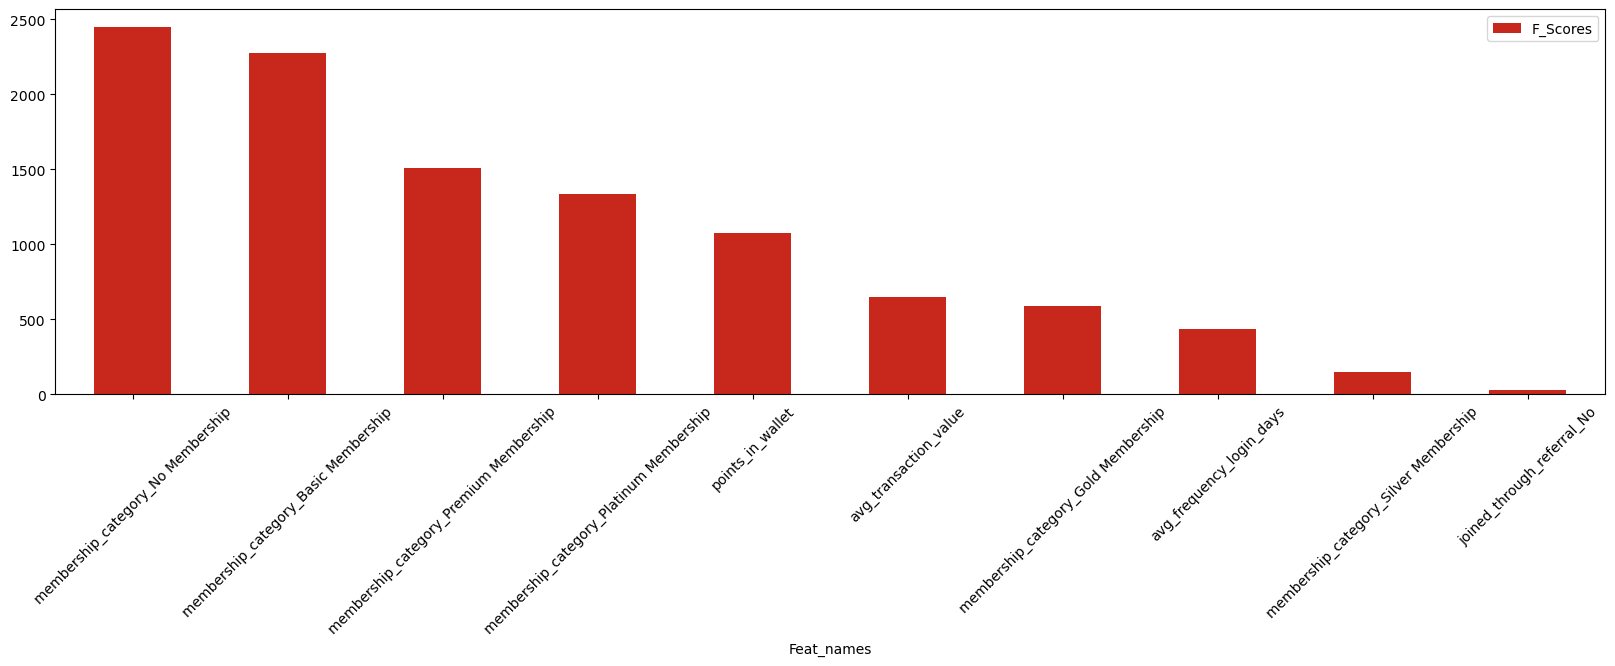

In [759]:
kbest_features = get_important_features_select_kbest_method(df, 10)

### 2.7.3 Random Forest Importance  <a class="anchor" id="sub_section_2_7_3"></a>

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [760]:
def get_important_features_rfi_method(df, n_features):
    rf = RandomForestClassifier(n_estimators=150)
    rf.fit(X, y)
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(X.columns, rf.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    importances.sort_values(by='Gini-importance', ascending=False)[:n_features].plot(kind='bar', rot=45, figsize=(20,5), color='#c8271b')
    return importances

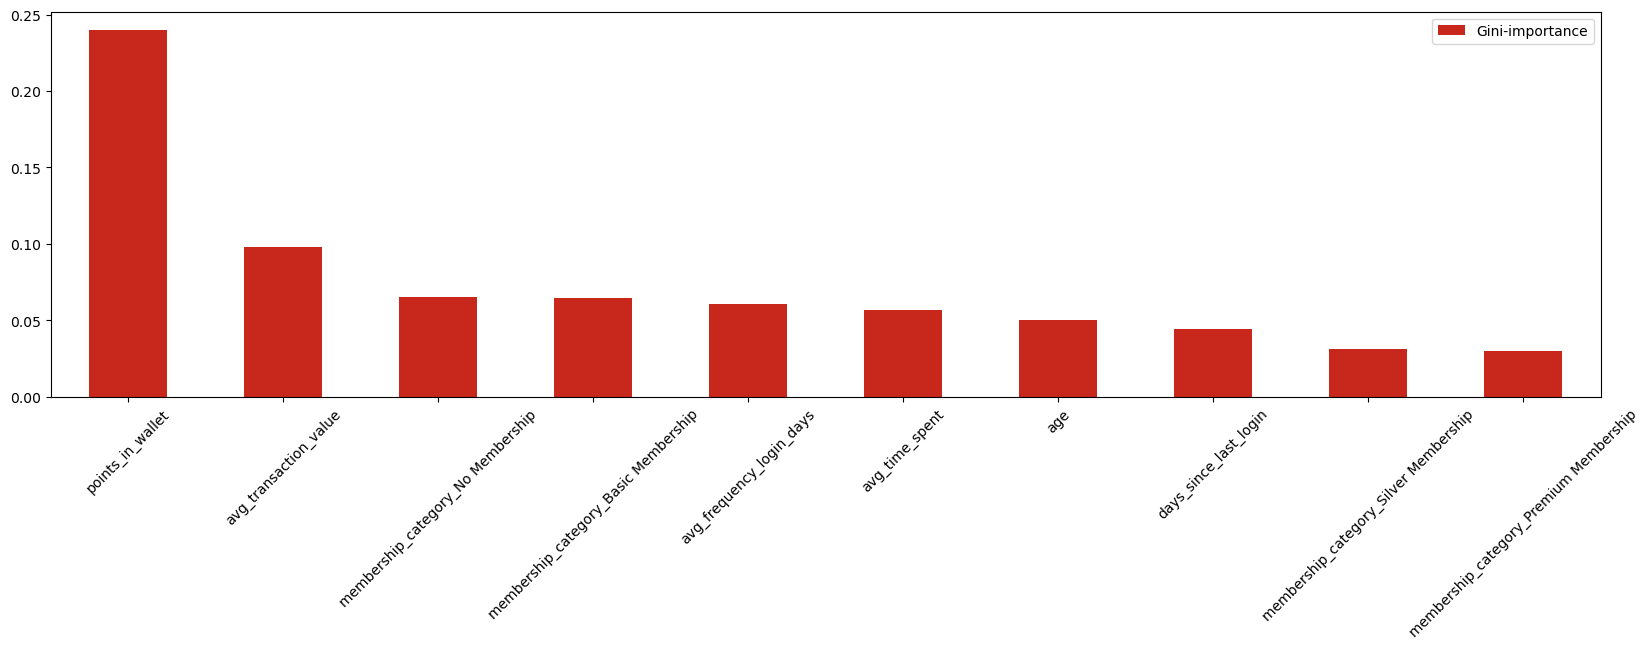

In [761]:
rfi_features = get_important_features_rfi_method(df, 10)

### 2.8 Feature scaling <a class="anchor" id="section_2_8"></a>

Feature scaling is a method used to **standardize the range of independent variables or features of data**. It is also known as data normalization or standardization. The goal is to **transform the data so that each feature is in the same range (e.g. between -1 and 1)**. This ensures that no single feature dominates the others, and makes training and tuning quicker and more effective. Feature scaling can be accomplished using a variety of linear and non-linear methods, including:
- Min-Max Scaling
- Normalization
- Standardization
- Robust Scaling

Please, note that this is importante because **algorithms that use Euclidean Distance measures are sensitive to magnitudes**. Examples of algorithms that are distance based are:

- K-Means uses the Euclidean distance measure here feature scaling matters. 
- K-Nearest-Neighbors also require feature scaling. 
- Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required. 
- Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

Other algorithms such as Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling. 





In [762]:
def standard_scaler(X):
    sc_X = StandardScaler()
    X_2 = pd.DataFrame(sc_X.fit_transform(X))
    X_2.columns = X.columns.values
    X_2.index = X.index.values
    X = X_2
    return X

In [763]:
scaled_X = standard_scaler(X)

## 3.  Model selection <a class="anchor" id="chapter3"></a>


### 3.1 Initial considerations <a class="anchor" id="section_3_1"></a>

First of all **we have to decide if we are dealing with a classification or regression problem**. Two possible approaches here:

- The engagement itself as a target value maintains the natural ordering, which means that its values can be sorted or compared between each other. This gives us a possibility to model the problem as a **regression task.**

- On the other hand, we could decide to ignore the ordering information and simply represent every value of the engagement with a separate class. This would lead us to a **classification task.**

Due to lack of time we will go for the second approach, classification.

We have an **unbalanced** dataset. Possible approaches are:

- Downsampling majority class
- Upsamplig monirity class with techniques such as SMOTE
- Model configuration. Most of the models have an hyperparameter to specify the proportion of each class, such as class_weight parameter of LogisticRegression

In this case we will apply the third option, but I when time is available I strongly recommed to try SMOTE because it has given me great results in the past.

### 3.2 Metric selection <a class="anchor" id="section_3_2"></a>

1. **ROC AUC**:

    Is the most used classification evaluation metric. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. For example when AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class. 

    However this concept is **not immediately applicable for muticlass classifiers**. In order to use **ROC Curves and ROC AUC in this scenario, we need another way to compare classes: OvR and OvO**.

    - **OvR (One vs Rest)**:
    OvR stands for “One vs Rest”, and as the name suggests is one method to evaluate multiclass models by comparing each class against all the others at the same time. In this scenario we take one class and consider it as our “positive” class, while all the others (the rest) are considered as the “negative” class.

    By doing this, we reduce the multiclass classification output into a binary classification one, and so it is possible to use all the known binary classification metrics to evaluate this scenario.

    We must repeat this for each class present on the data, so for a 3-class dataset we get 3 different OvR scores. In the end, we can average them (simple or weighted average) to have a final OvR model score. 

    - **OvO (One vs One):**
    Similar to OvR, but instead of comparing each class with the rest, we compare all possible two-class combinations of the dataset. Then we average all the OvO scores to get a final OvO model score.


2. **Accuracy**:

    It defines **how accurate your model is**. For example, if you build a model that classifies 'x' samples accurately, your accuracy is x%.


3. **Precision**: 

    Precision is the **ratio of correctly predicted positive observations to the total predicted positive observations**. The question that this metric answer is of all passengers that labeled as survived, how many actually survived?


4. **Recall (Sensitivity)**:
 
    Recall is the **ratio of correctly predicted positive observations to the all observations in actual class.**
    
    
5. **F1 score (F1):**

    F1 Score is the **weighted average of Precision and Recall**. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall



### 3.3 Baseline Classification Algorithms comparison <a class="anchor" id="section_3_3"></a>

Let’s model each regression algorithm over the training dataset and evaluate their accuracy and standard deviation scores to choose the best one

In [616]:
y = y -1

In [631]:
models = []

w = {0:1, 1:1, 2:1, 3:4, 4:4}
models.append(('Logistic Regression', LogisticRegression(class_weight= w, max_iter=150, random_state=0, multi_class='multinomial')))
models.append(('SVC', SVC(class_weight= w, kernel = 'linear', random_state = 0, probability=True)))
models.append(('Kernel SVM', SVC(class_weight= w, kernel = 'rbf', random_state = 0, probability=True)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(class_weight=w, criterion='entropy', random_state=0)))
models.append(('Random Forest', RandomForestClassifier(class_weight= w, n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(('XGBoost Classifier', XGBClassifier()))

#Evaluating Model Results:
auc_results = []
acc_results = []
f1_results = []

names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Weighted Mean', 'Accuracy Weighted Mean', 'F1 Weighted Mean']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=3, random_state=0, shuffle=True)

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, scaled_X, y, cv=kfold, scoring='roc_auc_ovr_weighted')
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, scaled_X, y, cv=kfold, scoring='balanced_accuracy')
    # f1 scoring:
    cv_f1_results = model_selection.cross_val_score(model, scaled_X, y, cv=kfold, scoring='f1_weighted')
    
    auc_results.append(cv_auc_results)
    acc_results.append(cv_acc_results)
    f1_results.append(cv_f1_results)

    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_f1_results.mean()*100, 2),
                         ]
    i += 1

model_results.sort_values(by=['ROC AUC Weighted Mean'], ascending=False)

,Algorithm,ROC AUC Weighted Mean,Accuracy Weighted Mean,F1 Weighted Mean
7,XGBoost Classifier,93.74,65.85,72.72
6,Random Forest,93.00,62.27,71.03
1,SVC,86.51,56.44,59.55
0,Logistic Regression,85.91,55.40,57.54
2,Kernel SVM,85.39,51.90,56.58
4,Gaussian NB,81.96,46.19,34.87
5,Decision Tree Classifier,79.66,63.89,69.57
3,KNN,77.93,39.41,51.40


**Visualize Classification Algorithms Accuracy Comparisons:**

**Using Area under ROC Curve:** From the first iteration of baseline classification algorithms, we can see that **XGBoost and Random Forest have outperformed the other five models** with the highest mean AUC Scores. Let’s reconfirm our results in the second iteration as shown in the next steps.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


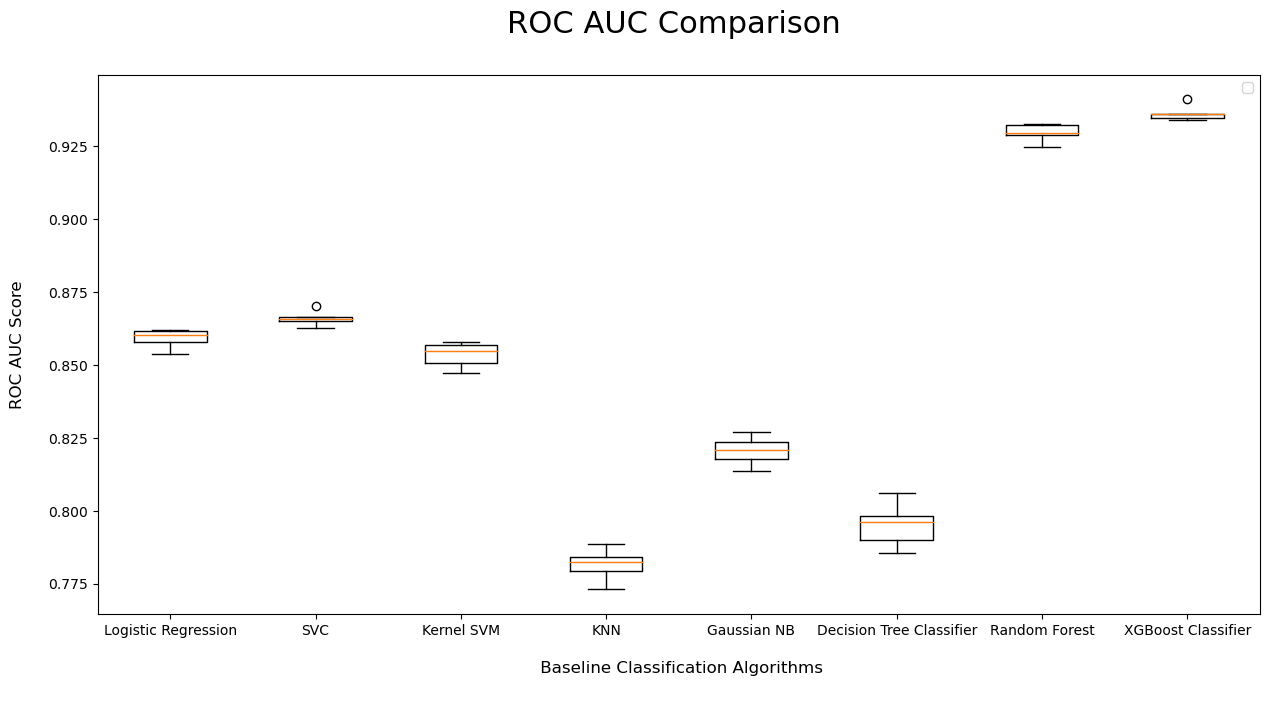

In [619]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

After this results **we will choose as XGBoost as our selected model.**

## 4  Model Improvement <a class="anchor" id="chapter4"></a>

### 4.1 Optuna hyperparameter optimization <a class="anchor" id="section_4_1"></a>

We will use **Optuna** package for hyperparameter tunning

Documentation: https://optuna.readthedocs.io/en/stable/index.html

Github: https://github.com/optuna/optuna

In [620]:
def objective(trial):

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)
    
    classifier_obj = XGBClassifier(**param)
    score = model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3, scoring='roc_auc_ovo_weighted')
    auc =  score.mean()
    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-01-22 19:30:14,684] A new study created in memory with name: no-name-e0b47b7f-8e0d-4475-b806-aa9724ba4f86
[I 2023-01-22 19:30:19,266] Trial 0 finished with value: 0.8629324090028252 and parameters: {'booster': 'gblinear', 'lambda': 9.339836641958474e-05, 'alpha': 1.480994154851253e-06, 'subsample': 0.5608428956544277, 'colsample_bytree': 0.2532951999704194}. Best is trial 0 with value: 0.8629324090028252.
[I 2023-01-22 19:30:41,975] Trial 1 finished with value: 0.9361939864905438 and parameters: {'booster': 'dart', 'lambda': 7.791161840605893e-06, 'alpha': 5.410576745918713e-07, 'subsample': 0.8951912283996155, 'colsample_bytree': 0.450817355361587, 'max_depth': 7, 'min_child_weight': 6, 'eta': 3.2341804013151706e-06, 'gamma': 0.019334015554265824, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 4.6734408419966345e-06, 'skip_drop': 5.39416420555471e-07}. Best is trial 1 with value: 0.9361939864905438.
[I 2023-01-22 19:31:08,871] Tria

[I 2023-01-22 19:34:41,036] Trial 17 finished with value: 0.9401910687666998 and parameters: {'booster': 'gbtree', 'lambda': 4.3279026996799504e-07, 'alpha': 0.2977507656814331, 'subsample': 0.6928041330276412, 'colsample_bytree': 0.883640738736657, 'max_depth': 7, 'min_child_weight': 4, 'eta': 0.03281368520098402, 'gamma': 3.630174172625669e-05, 'grow_policy': 'depthwise'}. Best is trial 15 with value: 0.9415261839293327.
[I 2023-01-22 19:34:44,600] Trial 18 finished with value: 0.9370885867842994 and parameters: {'booster': 'gbtree', 'lambda': 2.3292926489670025e-07, 'alpha': 0.6337901879365351, 'subsample': 0.6492406153250515, 'colsample_bytree': 0.8842873334619664, 'max_depth': 3, 'min_child_weight': 5, 'eta': 0.043686142858809, 'gamma': 2.085329232975812e-05, 'grow_policy': 'depthwise'}. Best is trial 15 with value: 0.9415261839293327.
[I 2023-01-22 19:34:51,651] Trial 19 finished with value: 0.9386547147307925 and parameters: {'booster': 'gbtree', 'lambda': 2.3414213923768846e-05

[I 2023-01-22 19:36:21,459] Trial 37 finished with value: 0.934306448536678 and parameters: {'booster': 'gbtree', 'lambda': 4.982173211481578e-06, 'alpha': 5.821384524432953e-05, 'subsample': 0.838896369871796, 'colsample_bytree': 0.8066408089324845, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.0016813759992456278, 'gamma': 0.03382947889600269, 'grow_policy': 'depthwise'}. Best is trial 32 with value: 0.9416406012640269.
[I 2023-01-22 19:36:27,319] Trial 38 finished with value: 0.9392023575201359 and parameters: {'booster': 'gbtree', 'lambda': 2.0095820064348527e-06, 'alpha': 2.612782848287072e-06, 'subsample': 0.762073358785837, 'colsample_bytree': 0.5804683584371995, 'max_depth': 7, 'min_child_weight': 2, 'eta': 0.011605322663355126, 'gamma': 4.6307494909740376e-05, 'grow_policy': 'lossguide'}. Best is trial 32 with value: 0.9416406012640269.
[I 2023-01-22 19:36:28,025] Trial 39 finished with value: 0.8346953120393529 and parameters: {'booster': 'gblinear', 'lambda': 6.80293922980

[I 2023-01-22 19:38:44,707] Trial 56 finished with value: 0.9413572432026 and parameters: {'booster': 'dart', 'lambda': 2.216322774007079e-05, 'alpha': 1.653750394359562e-06, 'subsample': 0.5713433610016186, 'colsample_bytree': 0.9746297632639455, 'max_depth': 3, 'min_child_weight': 6, 'eta': 0.16600379410981642, 'gamma': 0.00011636957068870708, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 3.014734879464151e-07, 'skip_drop': 0.02283163240406915}. Best is trial 52 with value: 0.942077472640625.
[I 2023-01-22 19:39:06,058] Trial 57 finished with value: 0.942407795024927 and parameters: {'booster': 'dart', 'lambda': 7.284330607769023e-07, 'alpha': 1.7235442132467685e-05, 'subsample': 0.7159617172227163, 'colsample_bytree': 0.9327433723361399, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.06243719332770337, 'gamma': 1.787908891544737e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.88

[I 2023-01-22 19:44:12,491] Trial 71 finished with value: 0.9421479827893801 and parameters: {'booster': 'dart', 'lambda': 0.007705837308827306, 'alpha': 2.1187550629715694e-05, 'subsample': 0.8079769567187467, 'colsample_bytree': 0.963566917265612, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.09480564482044321, 'gamma': 2.3909240267354543e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 5.6025956252107936e-08, 'skip_drop': 0.17308063287289913}. Best is trial 62 with value: 0.9430962986928986.
[I 2023-01-22 19:44:34,958] Trial 72 finished with value: 0.9410771186919459 and parameters: {'booster': 'dart', 'lambda': 0.007292310757317134, 'alpha': 1.5467590830133183e-05, 'subsample': 0.8038317793072479, 'colsample_bytree': 0.9481882007851438, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.13099772296960657, 'gamma': 3.069693757639633e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 

[I 2023-01-22 19:49:32,612] Trial 86 finished with value: 0.9396730323623143 and parameters: {'booster': 'dart', 'lambda': 0.15775599292669057, 'alpha': 9.15845157580939e-08, 'subsample': 0.9771351127895872, 'colsample_bytree': 0.8302002754287825, 'max_depth': 5, 'min_child_weight': 9, 'eta': 0.022324342930983402, 'gamma': 3.680504877179021e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 6.130673501056869e-06, 'skip_drop': 0.0005282526694404652}. Best is trial 75 with value: 0.943153375757721.
[I 2023-01-22 19:49:53,890] Trial 87 finished with value: 0.9421426868681099 and parameters: {'booster': 'dart', 'lambda': 5.196942393975145e-05, 'alpha': 2.539150224755105e-08, 'subsample': 0.8899159876480776, 'colsample_bytree': 0.8524193955918701, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.04476462834761666, 'gamma': 0.00015772054856819085, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 4

In [621]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")

The best trial is : 
FrozenTrial(number=99, values=[0.9436063315147751], datetime_start=datetime.datetime(2023, 1, 22, 19, 53, 30, 795018), datetime_complete=datetime.datetime(2023, 1, 22, 19, 53, 52, 197655), params={'booster': 'dart', 'lambda': 0.059171375387280054, 'alpha': 8.069362915809222e-07, 'subsample': 0.8983923059458807, 'colsample_bytree': 0.8769734616927287, 'max_depth': 5, 'min_child_weight': 6, 'eta': 0.07669099782826251, 'gamma': 4.0059280383193446e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 3.8136380057752487e-08, 'skip_drop': 0.03663373783385477}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'gblinear', 'dart')), 'lambda': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'alpha': FloatDistribution(high=1.0, log=True, low=1e-08, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.2, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, s

Now it is time to try the **XGBoost with the optimized hyperparameters**

In [681]:
model = XGBClassifier(study.best_params)
kfold = model_selection.KFold(n_splits=5, random_state=0, shuffle=True)

# roc_auc scoring:
cv_auc_results = model_selection.cross_val_score(model, scaled_X, y, cv=3, scoring='roc_auc_ovo_weighted')
# accuracy scoring:
cv_acc_results = model_selection.cross_val_score(model, scaled_X, y, cv=3, scoring='balanced_accuracy')
# f1 scoring:
cv_f1_results = model_selection.cross_val_score(model, scaled_X, y, cv=3, scoring='f1_weighted')

/Users/lauraruizmartinez/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [682]:
print(cv_auc_results.mean(), cv_acc_results.mean(), cv_f1_results.mean())

0.9372828280276476 0.6568630608592475 0.7252835661232174


Finally let's get the **features importance** with our selected model

In [697]:
def get_xgb_imp(xgb, feat_names):
    imp_vals = xgb.get_booster().get_fscore()
    feats_imp = pd.DataFrame(imp_vals,index=np.arange(2)).T
    feats_imp.iloc[:,0]= feats_imp.index    
    feats_imp.columns=['feature','importance']
    feats_imp.sort_values('importance',inplace=True,ascending=False)
    feats_imp.reset_index(drop=True,inplace=True)
    return feats_imp

In [698]:
model = XGBClassifier(study.best_params)
model = model.fit(scaled_X, y)
feat_names = scaled_X.columns

In [700]:
feature_importance_df=get_xgb_imp(model, feat_names)

## 5. Model deployment <a class="anchor" id="chapter6"></a>

Lastly, deploy the model to a server using ‘joblib’ library so that we can productionize the end-to-end machine learning framework. Later we can run the model over any new dataset to predict the customer engagement.

In [765]:
filename = 'xbg_engagement.model'
i = [model]
joblib.dump(i,filename)

['xbg_engagement.model']